# Imports

In [2]:
import numpy as np
import pandas as pd

# Open The Data

In [40]:
maths_assessment_data = pd.read_csv('task_data/task_qla_df.csv')

# Let's take a look at what this looks like

display(maths_assessment_data.head())
display(maths_assessment_data)
print(f'The columns across the csv dataset are {maths_assessment_data.columns}')

# Will need to check for missing data and NaNs here as not obvious just by looking

student_id assessment_id           assessment_name  n_questions_entered  \
0      b61c4         94245  Year 7 Term 3 Assessment                   36   
1      d47b3         94245  Year 7 Term 3 Assessment                   36   
2      01093         94245  Year 7 Term 3 Assessment                   36   
3      2a270         94245  Year 7 Term 3 Assessment                   36   
4      24de5         94245  Year 7 Term 3 Assessment                   36   

   n_questions_attempted  n_assessment_questions  absent  mark  \
0                     36                      36   False  34.0   
1                     36                      36   False  37.0   
2                     36                      36   False  42.0   
3                     36                      36   False  27.0   
4                     36                      36   False  37.0   

   available_marks                           created  \
0               60  2024-06-27 14:18:23.948111+00:00   
1               60  2024-07-08 13:52:46.036772+00:00   
2               60  2024-07-03 08:08:21.592102+00:00   
3               60  2024-07-04 07:52:38.344720+00:00   
4               60  2024-07-13 18:57:19.360425+00:00   

                       last_updated  
0  2024-06-27 14:22:34.230140+00:00  
1  2024-07-08 14:24:42.552651+00:00  
2  2024-07-03 08:22:59.515326+00:00  
3  2024-07-04 08:21:34.395024+00:00  
4  2024-07-13 19:30:58.809699+00:00

student_id assessment_id                assessment_name  \
0         b61c4         94245       Year 7 Term 3 Assessment   
1         d47b3         94245       Year 7 Term 3 Assessment   
2         01093         94245       Year 7 Term 3 Assessment   
3         2a270         94245       Year 7 Term 3 Assessment   
4         24de5         94245       Year 7 Term 3 Assessment   
...         ...           ...                            ...   
5822      89d7f         21196       Year 8 Term 2 Assessment   
5823      127e6         255e1  Year 9 End of Year Assessment   
5824      d5ca6         22b48       Year 9 Term 1 Assessment   
5825      99f61         a5a5e       Year 9 Term 2 Assessment   
5826      75d39         a5a5e       Year 9 Term 2 Assessment   

      n_questions_entered  n_questions_attempted  n_assessment_questions  \
0                      36                     36                      36   
1                      36                     36                      36   
2                      36                     36                      36   
3                      36                     36                      36   
4                      36                     36                      36   
...                   ...                    ...                     ...   
5822                   36                     36                      36   
5823                   28                     28                      37   
5824                    9                      9                      35   
5825                    0                      0                      34   
5826                    4                      4                      34   

      absent  mark  available_marks                           created  \
0      False  34.0               60  2024-06-27 14:18:23.948111+00:00   
1      False  37.0               60  2024-07-08 13:52:46.036772+00:00   
2      False  42.0               60  2024-07-03 08:08:21.592102+00:00   
3      False  27.0               60  2024-07-04 07:52:38.344720+00:00   
4      False  37.0               60  2024-07-13 18:57:19.360425+00:00   
...      ...   ...              ...                               ...   
5822   False  28.0               60  2025-04-08 20:18:13.266683+00:00   
5823   False  40.0               60  2024-06-12 19:14:54.588948+00:00   
5824   False   9.0               60  2023-11-29 10:13:46.081744+00:00   
5825   False   NaN               60  2024-04-29 15:02:35.241599+00:00   
5826   False   4.0               60  2024-04-21 10:32:31.657298+00:00   

                          last_updated  
0     2024-06-27 14:22:34.230140+00:00  
1     2024-07-08 14:24:42.552651+00:00  
2     2024-07-03 08:22:59.515326+00:00  
3     2024-07-04 08:21:34.395024+00:00  
4     2024-07-13 19:30:58.809699+00:00  
...                                ...  
5822  2025-04-08 20:40:19.587271+00:00  
5823  2024-06-12 19:16:15.394046+00:00  
5824  2023-11-29 10:17:30.932170+00:00  
5825  2024-04-29 15:03:17.358916+00:00  
5826  2024-04-21 10:33:02.384589+00:00  

[5827 rows x 11 columns]

The columns across the csv dataset are Index(['student_id', 'assessment_id', 'assessment_name', 'n_questions_entered',
       'n_questions_attempted', 'n_assessment_questions', 'absent', 'mark',
       'available_marks', 'created', 'last_updated'],
      dtype='object')


In [12]:
maths_assessment_feather = pd.read_feather('task_data/task_tia_df.feather')

# Let's take a look at what this looks like

display(maths_assessment_feather.head())
print(f'The columns across the feather dataset are {maths_assessment_feather.columns}')

# On first look there appears to be lots of missing data / NaNs here so will need to clean this.

index student_id package_id                 first_start_time  \
0  1100672      f6105      081b0 2025-04-06 21:08:53.567000+00:00   
1     4786      f6105      efdbe 2024-06-02 16:50:04.338000+00:00   
2   340068      f6105      b8685 2025-03-09 17:03:30.877000+00:00   
3   135582      f6105      431d6                              NaT   
4   288247      f6105      772e9 2025-03-04 19:40:50.862000+00:00   

                   last_start_time  task_index  task_item_index  \
0 2025-04-06 21:09:55.161000+00:00           1                3   
1 2024-06-14 16:27:20.083000+00:00           3                3   
2 2025-03-09 17:06:44.174000+00:00           1                4   
3                              NaT           5                5   
4 2025-03-04 19:41:17.004000+00:00           5                2   

   assigned_number_homeworks_ago learning_unit_id question_id  \
0                              0            ecbb8       55587   
1                              0            48303       7477a   
2                              0            4a12e       0a175   
3                             10            d26a1       af8ef   
4                             10            98957       3c1ee   

   n_times_prior_correct summary  time_to_first_correct  video_time  
0                      0     WWC                 64.619         0.0  
1                      0      AA                    NaN         0.0  
2                      0     AWC                 91.804         0.0  
3                      0    None                    NaN         NaN  
4                      2      AC                 32.449         0.0

The columns across the feather dataset are Index(['index', 'student_id', 'package_id', 'first_start_time',
       'last_start_time', 'task_index', 'task_item_index',
       'assigned_number_homeworks_ago', 'learning_unit_id', 'question_id',
       'n_times_prior_correct', 'summary', 'time_to_first_correct',
       'video_time'],
      dtype='object')


# Mandated Question 1

In [27]:
### Start with the CSV file ###

# How many distinct students do we have both assessment and activity data for?
column_of_interest = 'student_id'

# Need to check that the student_id column has all values as strings NOT NaNs or Missing Values
has_nan_in_student_id = maths_assessment_data[column_of_interest].isna().any()

print('CSV student_id Column has missing values or NaNs?')
print(has_nan_in_student_id)

# We now know that the column contains no NaNs so let's ensure they are unique
column_is_unique = maths_assessment_data[column_of_interest].is_unique

print('CSV student_id Column has unique values?')
print(column_is_unique)

# Not unique - there is repeated studnet_id so I need to extract the unique values
unique_student_ids = maths_assessment_data[column_of_interest].unique()

print(f'The total number of unique student_ids from the csv data is {len(unique_student_ids)}')

### Repeat Above for Feather File ###
has_nan_in_student_id_feather = maths_assessment_feather[column_of_interest].isna().any()

print('Feather student_id Column has missing values or NaNs?')
print(has_nan_in_student_id_feather)

# We now know that the column contains no NaNs so let's ensure they are unique
column_is_unique_feather = maths_assessment_feather[column_of_interest].is_unique

print('Feather student_id Column has unique values?')
print(column_is_unique_feather)

# Not unique - there is repeated studnet_id so I need to extract the unique values
unique_student_ids_feather = maths_assessment_feather[column_of_interest].unique()

print(f'The total number of unique student_ids from the feather data is {len(unique_student_ids_feather)}')

CSV student_id Column has missing values or NaNs?
False
CSV student_id Column has unique values?
False
The total number of unique student_ids from the csv data is 1400
Feather student_id Column has missing values or NaNs?
False
Feather student_id Column has unique values?
False
The total number of unique student_ids from the feather data is 1394


In [33]:
### Bring the two together ###
# If I start off with the unique values from the csv I can just run a check against the feather file
combined_unique_student_ids = list(unique_student_ids) 

# Loop over the unique values from the feather file
for student_id in unique_student_ids_feather:
    if student_id in combined_unique_student_ids:
        pass # Do nothing - the student_id already exists and I don't want repeats
    else:
        combined_unique_student_ids.append(student_id)

print(f'The total number of distinct student_ids from both files is {len(combined_unique_student_ids)}')

The total number of distinct student_ids from both files is 1400


# Mandated Question 2

In [65]:
# For students who completed at least two assessments, what was the mean progress they made from one test to the next?

# Consider only the csv data here.
column_of_interest = 'student_id'

maths_assessment_data[column_of_interest].isna().any()

# I want to extract all rows with non-unique student_ids
duplicated_student_ids_df = maths_assessment_data[maths_assessment_data[column_of_interest].duplicated(keep=False)]

# Compare the shape of the starting dataframe and what we have extracted and see if there is a difference
print(f'The shape of the initial dataframe is {maths_assessment_data.shape}')
print(f'The shape of the extracted dataframe is {duplicated_student_ids_df.shape}')

# These two numbers are the same which tells me that every student has completed at least two assessments

# I will define progress as the % improvement from one assessment to the next.
# That is, if a student got 50% in assessment 1 and 75% in assessment 2 then their progress would be 50% improvement

# Firstly, let's do this on one student to check this makes sense!
student_id_test = combined_unique_student_ids[0] # Get the 0th student_id
# Subset the dataframe that relates to that student
subsetted_dataframe = maths_assessment_data[maths_assessment_data[column_of_interest] == student_id_test] 
display(subsetted_dataframe)

The shape of the initial dataframe is (5827, 11)
The shape of the extracted dataframe is (5827, 11)


student_id assessment_id                  assessment_name  \
0         b61c4         94245         Year 7 Term 3 Assessment   
788       b61c4         ffd60  Year 7 Baseline Assessment 2023   
1355      b61c4         9df0d    Year 7 End of Year Assessment   
2972      b61c4         73367         Year 7 Term 1 Assessment   
3559      b61c4         9be90         Year 7 Term 2 Assessment   
4875      b61c4         19c13         Year 8 Term 1 Assessment   
5565      b61c4         21196         Year 8 Term 2 Assessment   

      n_questions_entered  n_questions_attempted  n_assessment_questions  \
0                      36                     36                      36   
788                    46                     45                      46   
1355                   43                     43                      43   
2972                   47                     47                      47   
3559                   35                     35                      35   
4875                   36                     36                      36   
5565                   36                     36                      36   

      absent  mark  available_marks                           created  \
0      False  34.0               60  2024-06-27 14:18:23.948111+00:00   
788    False  45.0               60  2023-09-20 14:18:32.768000+00:00   
1355   False  44.0               60  2024-06-19 14:22:11.198573+00:00   
2972   False  41.0               60  2023-11-29 16:58:52.236981+00:00   
3559   False  51.0               60  2024-03-11 22:11:52.458998+00:00   
4875   False  43.0               60  2024-12-05 13:30:27.412339+00:00   
5565   False  38.0               60  2025-03-12 21:29:06.738462+00:00   

                          last_updated  
0     2024-06-27 14:22:34.230140+00:00  
788   2023-09-20 14:23:52.441606+00:00  
1355  2024-06-19 14:30:14.231967+00:00  
2972  2023-11-29 17:13:33.721657+00:00  
3559  2024-03-11 22:19:28.489468+00:00  
4875  2024-12-05 13:34:42.714479+00:00  
5565  2025-03-12 21:42:16.393432+00:00

In [78]:
# There is an issue that the assessments appear to be in the wrong order.
# I would expect to see Year7 Baseline, Year7 Term 1, Year 7 Term 2, Year 7 Term 3, Year 7 End of Year, [Repeated for Year 8, 9 etc]
# So I need to get the unique assessments and take a closer look at them

column_of_interest='assessment_name'

# Determine the Unique assessment_names
assessment_names = maths_assessment_data[column_of_interest].unique()
print(f'List of assessment_names: {assessment_names}')

# Let's hard code a list that seems to be in the correct order
correct_order_assessment_names = [
    'Year 7 Baseline Assessment 2023',
    'Year 7 Baseline Assessment 2024',
    'Year 7 Term 1 Assessment',
    'Year 7 Term 2 Assessment',
    'Year 7 Term 3 Assessment',
    'Year 7 End of Year Assessment',
    'Year 8 Term 1 Assessment',
    'Year 8 Term 2 Assessment',
    'Year 9 Term 1 Assessment',
    'Year 9 Term 2 Assessment',
    'Year 9 End of Year Assessment'
]

# # This looks like a sensible order. Check that I haven't missed any out
print(set(assessment_names) == set(correct_order_assessment_names))

List of assessment_names: ['Year 7 Term 3 Assessment' 'Year 7 Baseline Assessment 2023'
 'Year 7 Baseline Assessment 2024' 'Year 7 End of Year Assessment'
 'Year 7 Term 1 Assessment' 'Year 7 Term 2 Assessment'
 'Year 8 Term 1 Assessment' 'Year 8 Term 2 Assessment'
 'Year 9 End of Year Assessment' 'Year 9 Term 1 Assessment'
 'Year 9 Term 2 Assessment']
True


In [105]:
### Try and extract the student_id with the assessments in this order ###

# Make my life easy and apply a decimal score to all rows
maths_assessment_data['decimal_score'] = maths_assessment_data['mark'] /  maths_assessment_data['available_marks']

# Need to handle two things here:
# 1) Not all students have done all tests

completed_assessments = list(subsetted_dataframe['assessment_name'])

# Loop over all students:
mean_progress = {}
for index, student in enumerate(combined_unique_student_ids): # Use enumerate here for developmnet purposes. 

    # Useful for development purposes
    # if index>1:
    #     break
    
    # Extract the dataframe for that student
    subsetted_dataframe = maths_assessment_data[maths_assessment_data['student_id'] == student] 
    
    # Extract the assessments they have completed
    completed_assessments = list(subsetted_dataframe['assessment_name'])

    # Filter the idealised list based on the asessments they have completed
    filtered_list = [item for item in correct_order_assessment_names if item in completed_assessments]

    # Now we need to loop over the filtered list and gather the percentages in the correct order
    percentage_list = []
    for assessment_name in filtered_list:
        decimal_score = subsetted_dataframe.loc[subsetted_dataframe['assessment_name'] == assessment_name]['decimal_score'].iloc[0]
        
        # We could check for NaNs here if we had time!
        percentage_list.append(decimal_score)

    
    average_progress = sum(percentage_list)/len(percentage_list)
    mean_progress[student]=average_progress

# Output the progress here
for i in mean_progress.keys():
    print(f'The student {i} had an average progress across assessments of {mean_progress[i]}')

print()



The mean progress across all students across all aseessments was nan
The student b61c4 had an average progress across assessments of 0.7047619047619048
The student d47b3 had an average progress across assessments of 0.6444444444444444
The student 01093 had an average progress across assessments of 0.6638888888888889
The student 2a270 had an average progress across assessments of 0.5555555555555555
The student 24de5 had an average progress across assessments of 0.5428571428571429
The student d72d8 had an average progress across assessments of 0.6
The student caec1 had an average progress across assessments of 0.22777777777777777
The student ac3a3 had an average progress across assessments of 0.2857142857142857
The student a52c9 had an average progress across assessments of 0.85
The student 78564 had an average progress across assessments of 0.6214285714285713
The student 33f66 had an average progress across assessments of 0.40714285714285714
The student 6af7b had an average progress acr

# Mandated Question 3

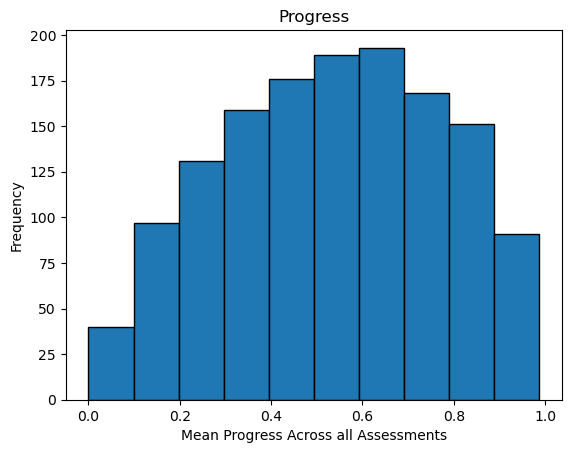

In [110]:
#Plot/visualise this ‘progress’ distribution.

import matplotlib.pyplot as plt
values = mean_progress.values()

# Create a histogram
plt.hist(values, bins=10, edgecolor='black')

# Add titles and labels
plt.title("Progress")
plt.xlabel("Mean Progress Across all Assessments")
plt.ylabel("Frequency")

# Show the plot
plt.show()